## <font color='darkviolet'>1. introduction</font><br>
##### Cars enable people to relocate and travel quickly without the necessity of significant physical effort. As a result, they have a profound impact on the business world, with many manufacturers redirecting their focus toward producing powerful, comfortable, and luxurious vehicles tailored to various markets.<br>

##### When it comes to selling or buying a car, numerous factors can influence its price and appeal to potential buyers. Our project will emphasize this critical aspect of the automotive industry and develop a model that will enable us to predict car prices effectively.

## <font color='darkviolet'> 2.Study's Goals</font>
#### 1.Explore Multiple Factors Affecting Car Prices
#### 2.Create a Predictive Models for Car Pricing

## <font color='darkviolet'> 3.Importing of libraries</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import sklearn as sk
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

## <font color='darkviolet'> 4.Data Preprocessing</font>

In [2]:

# Load data
data = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv', header=0)


In [3]:
#show firt rows
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#verify missing values
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
#verify duplicated rows
data.duplicated().sum()

0

In [6]:
#verify columns type
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

## <font color='darkviolet'>5. Data Analysis</font><br>

In [7]:
#show data statistics

data=data.sort_values('price')
max_price = data['price'].max()
min_price = data['price'].min()
mean_price = data['price'].mean()
q1 = data['price'].quantile(0.25)  # 1st quartile
q2 = data['price'].quantile(0.50)  # 2nd quartile (median)
q3 = data['price'].quantile(0.75) # 3rd quartile

# Create a summary table
summary_table = pd.DataFrame({
    'Statistic': ['Max Price_$', 'Min Price_$', 'Mean Price_$', 'Q1', 'Q2', 'Q3'],
    'Value': [round(max_price,2), round(min_price,2), round(mean_price,2), round(q1,2), round(q2,2), round(q3,2)]
})
summary_table = tabulate(summary_table )
# Display the summary table
print("----------Data's resume-----------")
print(summary_table)

----------Data's resume-----------
-  ------------  -------
0  Max Price_$   45400
1  Min Price_$    5118
2  Mean Price_$  13276.7
3  Q1             7788
4  Q2            10295
5  Q3            16503
-  ------------  -------



#### <font color="darkblue">Which fuels are most commonly used by manufacturers for producing cars?</font>


In [8]:
#calculate effectifs
fuel_count=data['fueltype'].value_counts()
fuel_count=pd.DataFrame({'fuel_type':fuel_count.index,'Quantity': fuel_count.values})


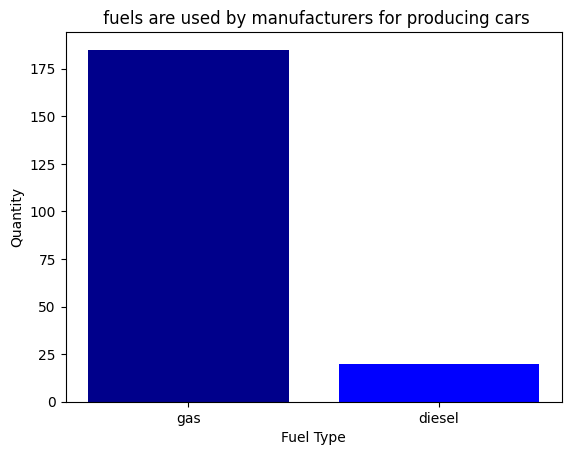

In [9]:
plt.bar(fuel_count['fuel_type'],fuel_count['Quantity'],align='center',color=['darkblue', 'blue'],label=True)
plt.title(" fuels are used by manufacturers for producing cars")
plt.xlabel("Fuel Type")
plt.ylabel("Quantity")
plt.show()

**Result**:   It seems that manufacturers are redirecting their efforts to produce gas-fueled cars more than those working with diesel, which can be a good decision for reducing emissions. Gas is considered a more ecological option compared to traditional fuels like gasoline or diesel.

#### <font color="darkblue"> Which Features are   most pertinent for    car prices Prediction?</font>



In [10]:
# drop inutil columns
data=data.drop(['car_ID','symboling','CarName' ],axis=1)

In [11]:
# numeriques columns
data_corr=pd.DataFrame()
for col in data.columns:
    if data[col].dtype == 'object':  # Check if the column is of type object
       pass 
    else:
        data_corr[col]=data[col]


In [12]:
#intialize  dataframe
data_cat = pd.DataFrame()
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':  # Vérifier si la colonne est de type objet
        # Appliquer l'encodage et créer un DataFrame
        data_cat[col] = le.fit_transform(data[col])  # Utiliser fit_transform au lieu de fit
data_cat.head()


,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,0,1,2,1,0,4,2,1
1,1,0,1,2,1,0,2,4,1
2,1,0,1,2,1,0,3,2,1
3,1,0,1,2,1,0,3,2,1
4,1,0,1,2,1,0,3,2,1


In [13]:
#construct new data of numeric values
data_numerique=pd.concat([data_cat,data_corr],axis=1)

In [14]:
 #calculate correlation       
num_corr=data_numerique.corr(method='pearson')

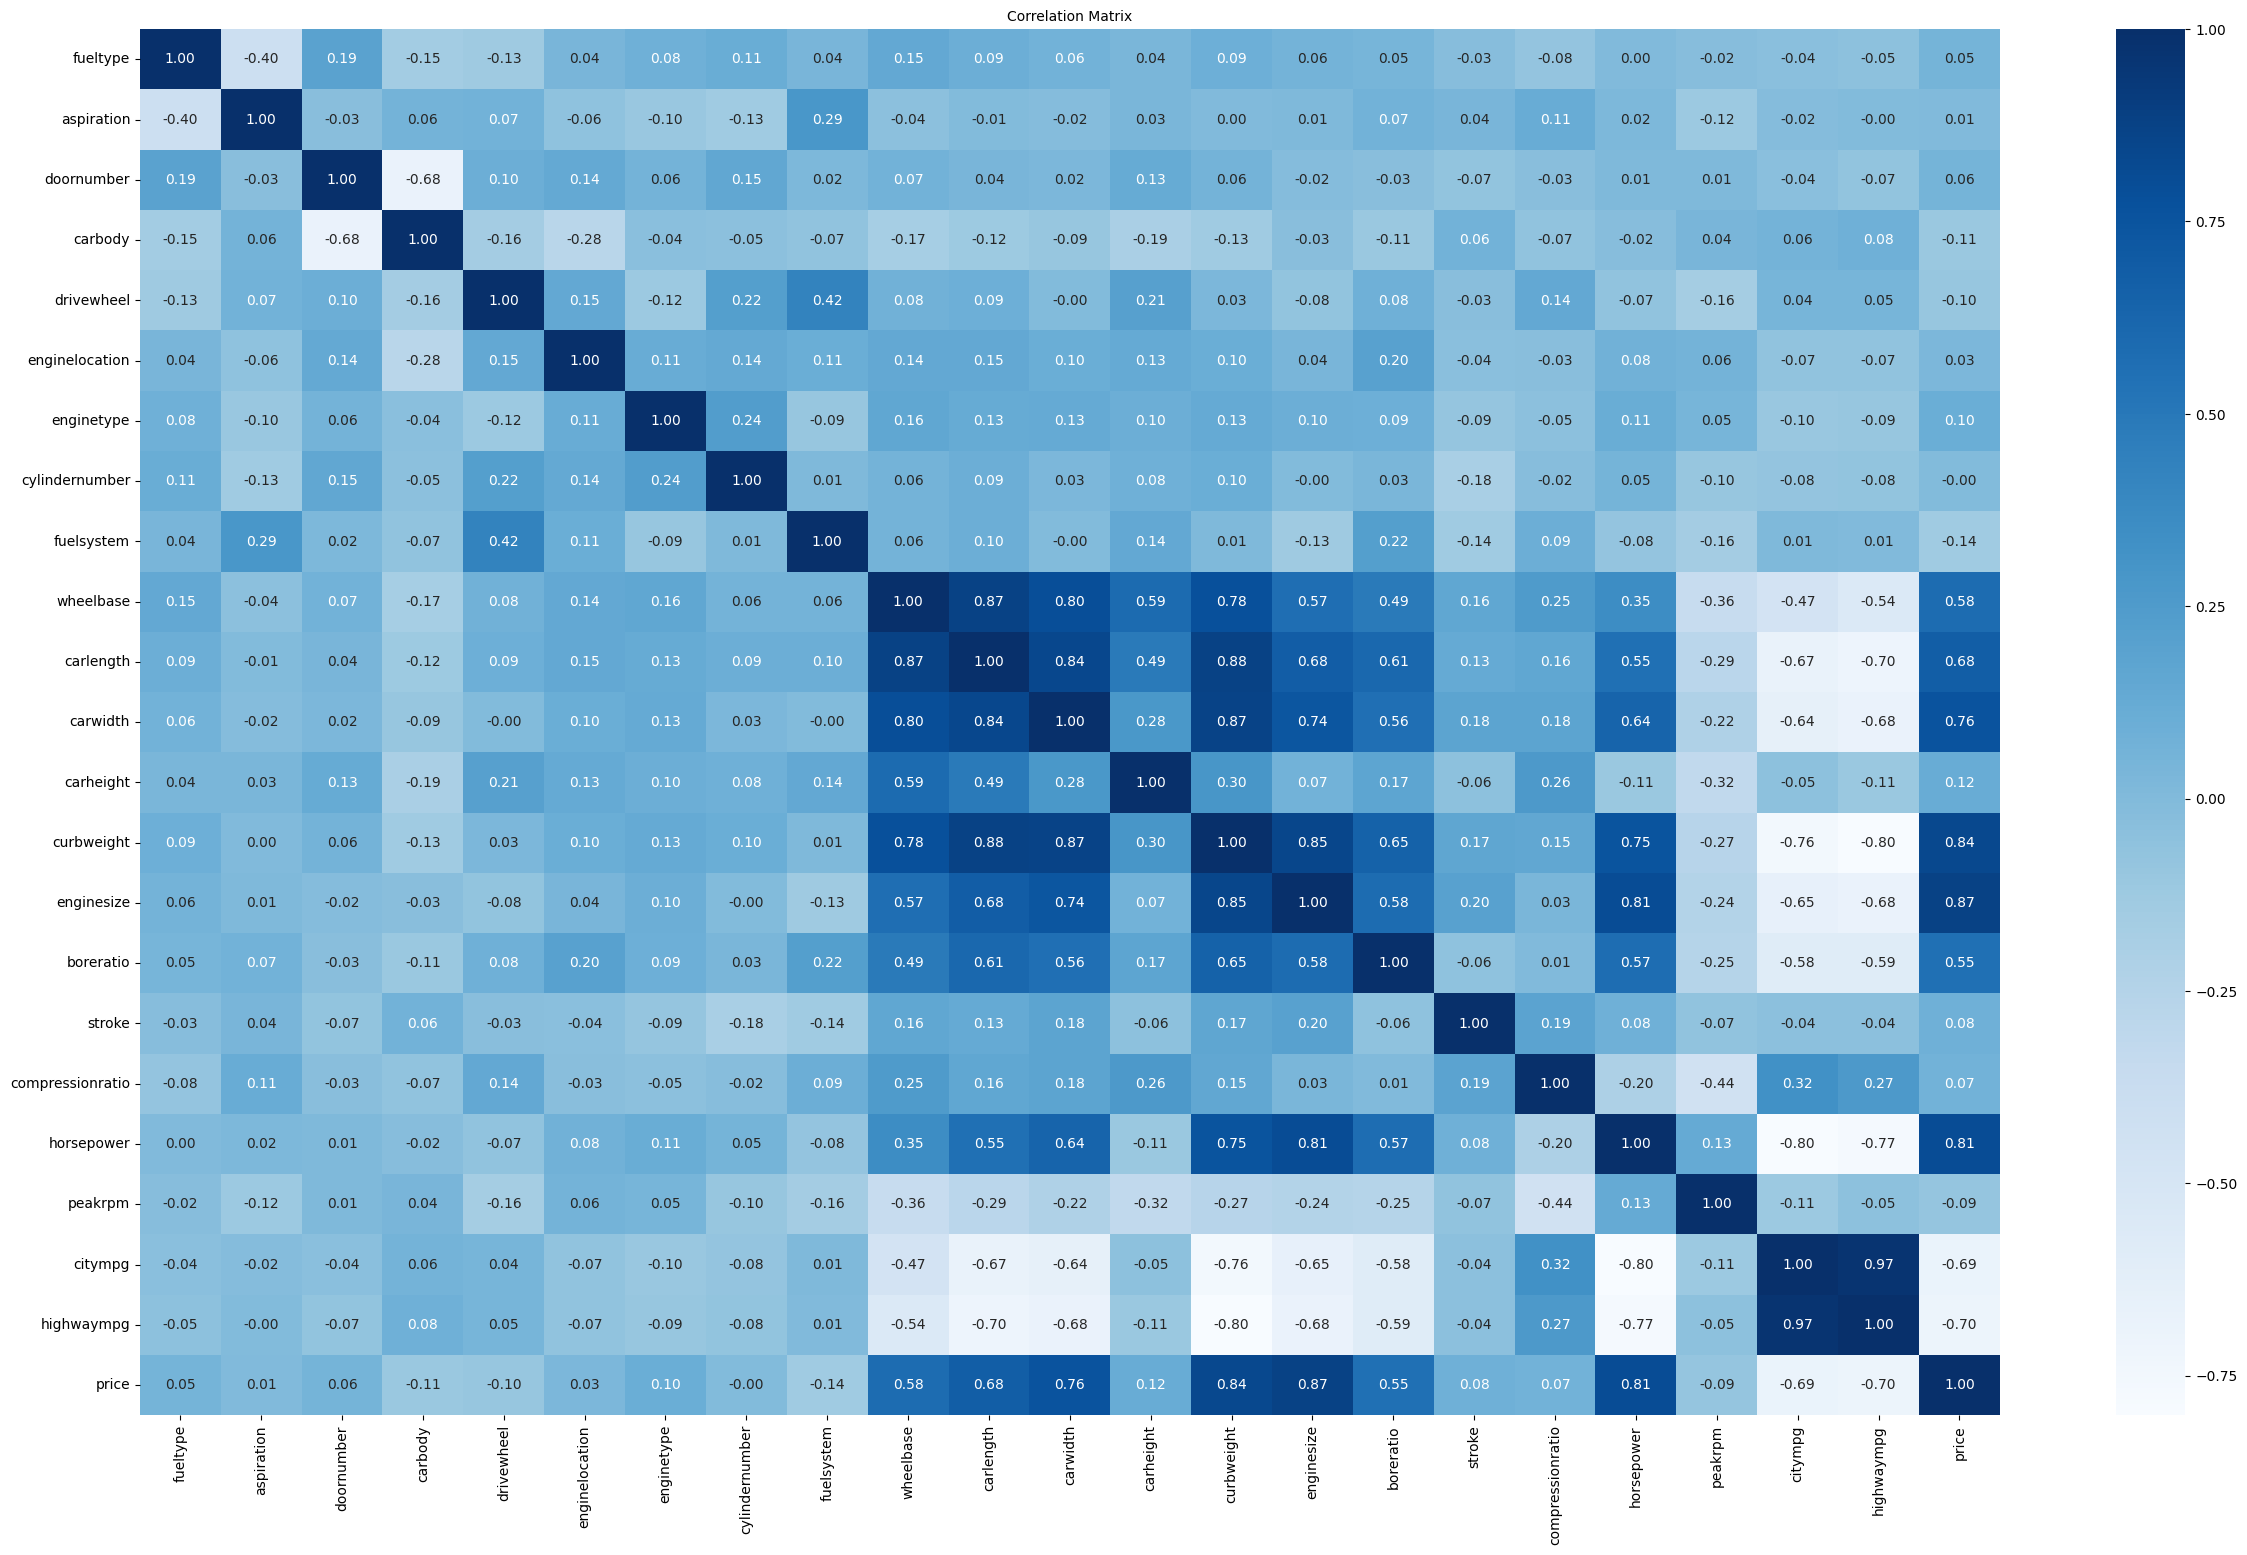

In [15]:
#plot heatmap of correlation
plt.figure(figsize=(30, 18))
sns.heatmap(num_corr, annot=True, fmt=".2f", cmap='Blues', cbar=True,
             xticklabels=num_corr.columns, yticklabels=num_corr.columns)

plt.title('Correlation Matrix', fontsize=10)
plt.show()


It appears that various features significantly impact price prediction, but these features may also be correlated with each other. To enhance our model, we will select the most relevant features and employ techniques to address feature correlation issues. The pertinent features influencing car prices include:

Drive Wheel: Refers to the wheels that receive power from the engine, affecting traction and handling.


Wheelbase: The distance between the front and rear axles, influencing stability and ride comfort.

Car Length: The overall length of the vehicle, affecting aerodynamics and interior space.

Car Width: The width of the vehicle, which can impact stability and handling characteristics.

Curb Weight: The weight of the vehicle when it’s not loaded with passengers or cargo, affecting acceleration and fuel efficiency.

Engine Size: The volume of the engine's cylinders, typically measured in liters; larger engines usually provide more power.

Bore Ratio: The ratio of the cylinder diameter to the piston stroke, influencing engine performance characteristics.

Horsepower: A measure of the engine's power output, affecting acceleration and top speed.

City MPG: Miles per gallon achieved in urban driving conditions, indicating fuel efficiency during stop-and-go traffic.

Highway MPG: Miles per gallon achieved during highway driving, reflecting fuel efficiency on longer, steady-speed journeys.

## <font color='darkviolet'>6. Preparation of Data for Model Pridection</font><br>

In [16]:
#drop no pertinent features 
data_Fet_sel=data_numerique.drop(['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','carheight','stroke','compressionratio','peakrpm'],axis=1)

In [17]:

# Standardize the data
scaler = StandardScaler()
# Split data into features and target
X = data_Fet_sel.drop('price', axis=1)
X = scaler.fit_transform(X)

y = data_Fet_sel['price'].values.reshape(-1, 1)  # Reshape y to 2D
y = scaler.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



#### <font color="darkblue"> First Model : Multiple Linear Regression</font>

In [18]:
#using direct Multiple linear regression as baseModel
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [19]:
# Evaluate the model on data test
predicted=lr.predict(X_test)
print("The model score is",round(r2_score(y_test,predicted)*100,2),"%")

The model score is 81.86 %


In [20]:
# Calculate the mean squared error 
mse = mean_squared_error(y_test, predicted)
print("the mean squared error is ",mse )

the mean squared error is  0.22553135390788323


#### <font color="darkblue"> Second Model : Ridge Regression</font>

In [21]:
#intialize the ridge instance
clf = Ridge()

# define Alpha grid search
param_grid = {
    'alpha': [0.00001, 0.001, 0.01,0.1,1,0.5]}

# Configuration of  GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=None, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("best param : ", grid_search.best_params_)
# using best param
best_model = grid_search.best_estimator_
#fit best param on  train data
best_model.fit(X_train, y_train)

best param :  {'alpha': 1}


Ridge(alpha=1)

In [22]:
ridge_predicted=best_model.predict(X_test)
print("The  Ridge model score is",round(r2_score(y_test,ridge_predicted)*100,2),"%")
# Calculate the mean squared error 
mse_ridge = mean_squared_error(y_test, ridge_predicted)
print("the mean squared error is ",mse_ridge )

The  Ridge model score is 81.76 %
the mean squared error is  0.2267585333741061



#### <font color="darkblue">Do we need more features for car price prediction?</font>
Let's consider all the features in our dataset and examine their influence.

In [23]:

# Standardize the data
scaler = StandardScaler()
# Split data into features and target
X1 = data_numerique.drop('price', axis=1)
X1 = scaler.fit_transform(X1)

y1 =data_numerique['price'].values.reshape(-1, 1)  # Reshape y to 2D
y1 = scaler.fit_transform(y)

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, test_size=0.2, random_state=42)


#### <font color="darkblue"> We will use again Ridge Regression to control Correaltion between features</font>

In [24]:
#intialize the ridge instance
clf1 = Ridge()

# define Alpha grid search
param_grid = {
    'alpha': [0.00001, 0.001, 0.01,0.1,1,0.5]}

# Configuration of  GridSearchCV
grid_search = GridSearchCV(estimator=clf1, param_grid=param_grid, cv=None, scoring='neg_mean_squared_error')
grid_search.fit(X_train1, y_train1)
print("best param : ", grid_search.best_params_)
# using best param
best_model1 = grid_search.best_estimator_
#fit best param on  train data
best_model1.fit(X_train1, y_train1)

best param :  {'alpha': 1}


Ridge(alpha=1)

In [25]:
ridge1_predicted=best_model1.predict(X_test1)
print("The  Ridge model score is",round(r2_score(y_test,ridge1_predicted)*100,2),"%")
# Calculate the mean squared error 
mse_ridge1 = mean_squared_error(y_test1, ridge1_predicted)
print("the mean squared error is ",mse_ridge1 )

The  Ridge model score is 83.11 %
the mean squared error is  0.2099827984562484


#### <font color="darkblue"> Let's Try Lasso Regression</font>
(Select features)

In [26]:
# Définir le modèle Lasso
lasso = Lasso()

# Définir la grille de paramètres pour la recherche
param_grid = {
    'alpha': [0.01, 0.1, 1.0]}
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=None, scoring='neg_mean_squared_error')

grid_search.fit(X_train1, y_train1)

print("Meilleurs paramètres : ", grid_search.best_params_)

best_model2 = grid_search.best_estimator_

best_model2.fit(X_train1, y_train1)

Meilleurs paramètres :  {'alpha': 0.01}


Lasso(alpha=0.01)

In [27]:
lasso_predicted=best_model2.predict(X_test1)
print("The  Lasso model score is",round(r2_score(y_test1,lasso_predicted)*100,2),"%")
# Calculate the mean squared error 
mse_lasso = mean_squared_error(y_test1, lasso_predicted)
print("the mean squared error is ",mse_lasso)

The  Lasso model score is 83.08 %
the mean squared error is  0.21029587346272788


#### <font color="darkblue"> Using PCA with Linear Regression</font>
(Reduce dimensionnality and remove correlation)

In [28]:

# 4. Apply PCA
# Choose the number of components
pca = PCA(n_components=19)  # 19 gives the best result 
X_train_pca = pca.fit_transform(X_train1)
X_test_pca = pca.transform(X_test1)
# 5. Fit Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_pca, y_train)
# 6. Make predictions
y_pred = regressor.predict(X_test_pca)
print("The  model score is",round(r2_score(y_test,y_pred)*100,2),"%")

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

The  model score is 84.5 %
Mean Squared Error: 0.19270637525564932


## <font color='darkviolet'> 7.Resume of Model's results</font>

| Model                                 | R2_score | MSE  |
|-------------------------------------- |----------|------|
| Linear Regression(features selection) |  81.86%  | 0.225|
| Ridge Regression(features selection)  |  81.76%  | 0.226|
| Ridge Regression(All features)        |  83.11 % | 0.209|
| Lasso Regression                      |  83.08%  | 0.210|
| ACP & Linear Regression               | 84.5 %   | 0.192|


Our model's highest score was 84.5% with an MSE of 0.192. This is good, but it may require other algorithms to achieve higher scores and lower MSE.
